In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\QualityPrediction.csv")

## Taking a look into data

In [3]:
df1=df

In [4]:
df1.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Visualization/Feature Engineering

In [6]:
df1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [7]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


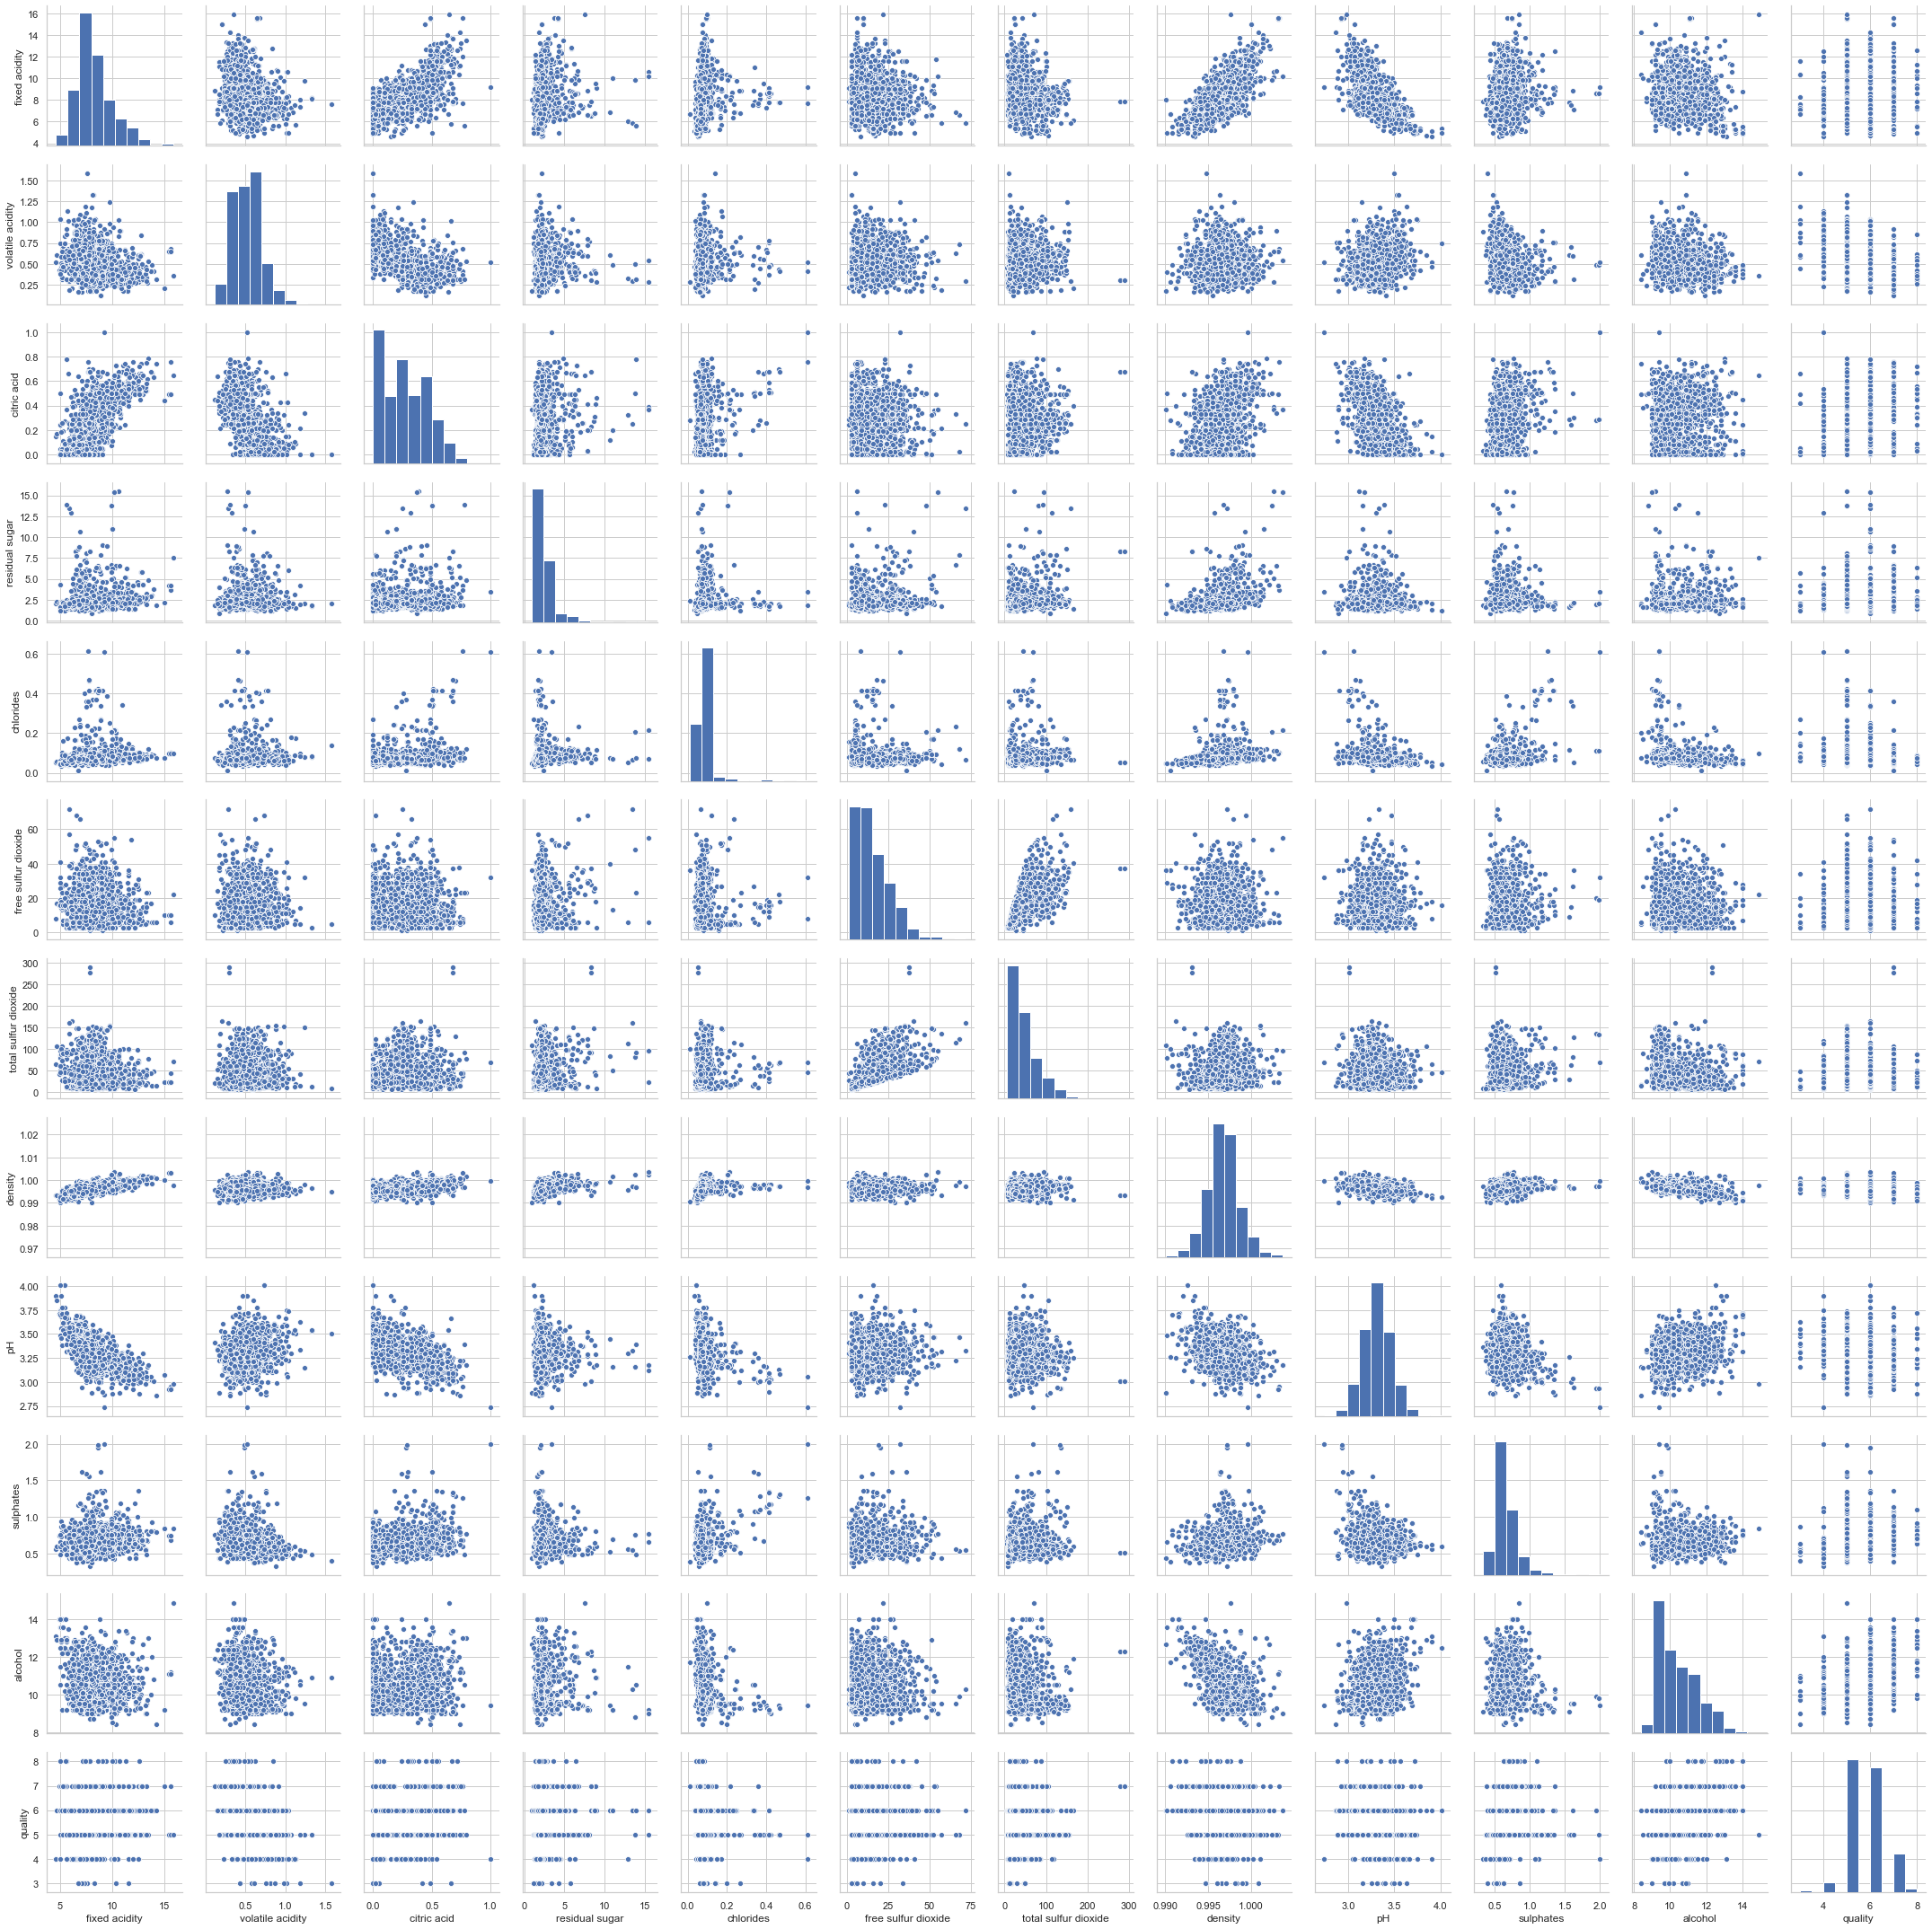

In [8]:
sns.pairplot(df1)

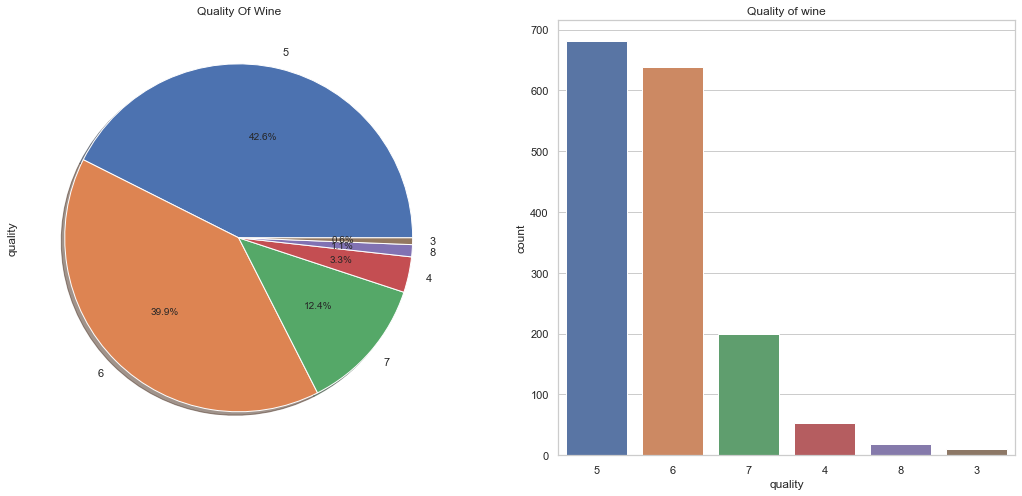

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df1['quality'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Quality Of Wine')
#ax[0].set_ylabel('Count')
sns.countplot('quality',data=df,ax=ax[1],order=df1['quality'].value_counts().index)
ax[1].set_title('Quality of wine')
#ax[1].set_xticklabels(rotation=30)
plt.show()

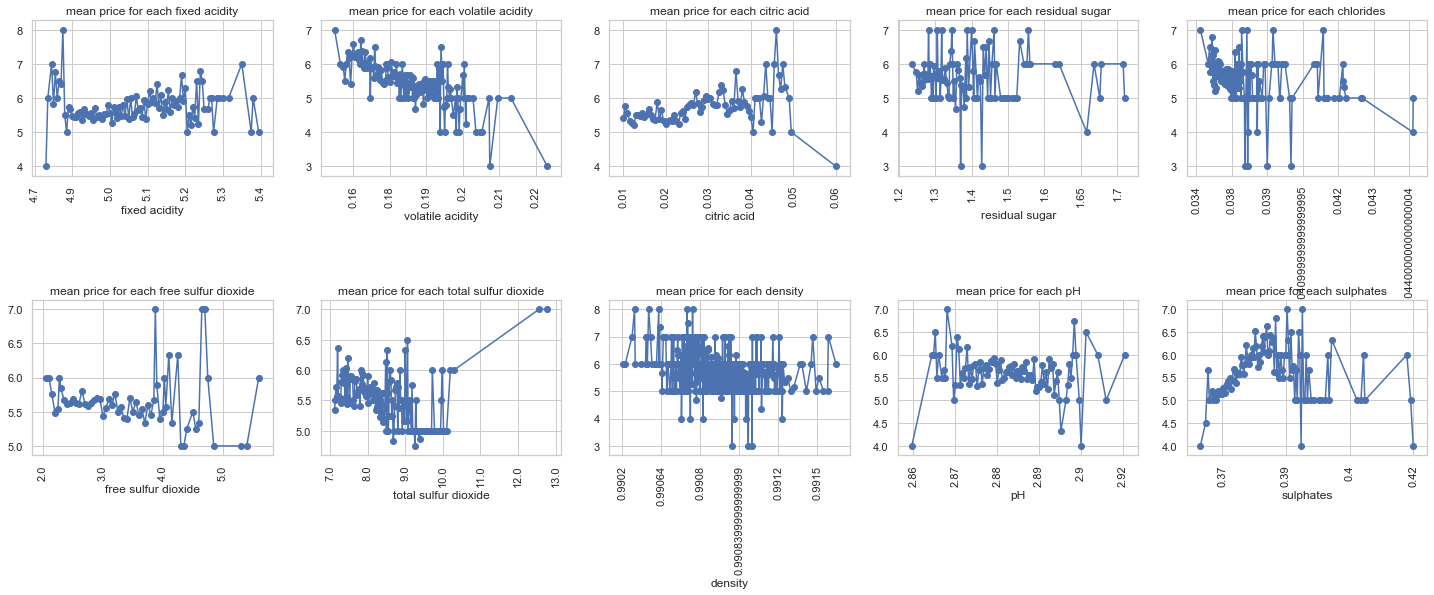

In [10]:
fig=plt.figure(figsize=(25, 8))
#cat_cols=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for i,j in zip(df1.columns, range(10)):
    ax=fig.add_subplot(2,5,j+1)
    c1=pd.pivot_table(index=i, values='quality', data=df1, aggfunc='mean')
    ax.plot(c1.index, c1['quality'])
    ax.scatter(c1.index, c1['quality'])
    ax.set_title('mean price for each {}'.format(i))
    ax.set_xlabel(i)
    ax.set_xticklabels(c1.index,rotation=90)
plt.subplots_adjust(hspace=0.8)
plt.show()

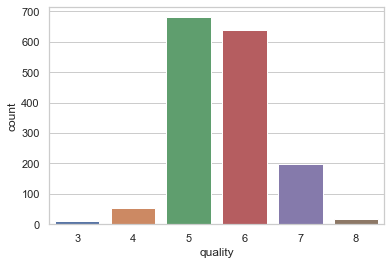

In [11]:
sns.countplot("quality",data=df1)

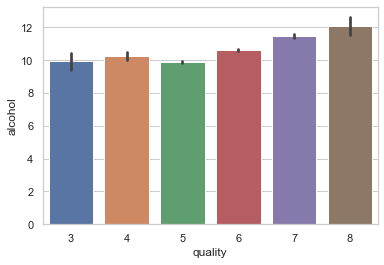

In [12]:
sns.barplot(df1.quality,df1.alcohol)

In [13]:
df1.quality.mean()

5.6360225140712945

In [14]:
df1.groupby("alcohol")["quality"].mean()

alcohol
8.400000     4.500000
8.500000     5.000000
8.700000     6.000000
8.800000     5.000000
9.000000     5.400000
               ...   
13.500000    6.000000
13.566667    7.000000
13.600000    6.750000
14.000000    6.714286
14.900000    5.000000
Name: quality, Length: 65, dtype: float64

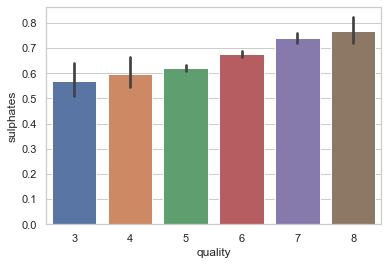

In [15]:
sns.barplot(df1.quality,df1.sulphates)

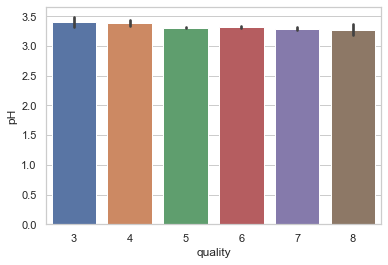

In [16]:
sns.barplot(df1.quality,df1.pH)

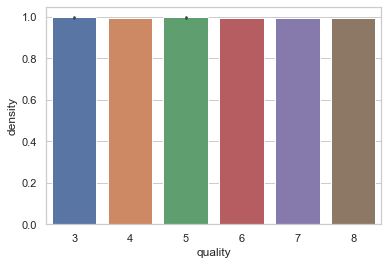

In [17]:
sns.barplot(df1.quality,df1.density)

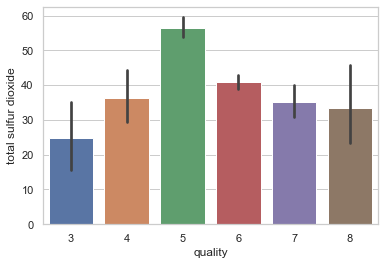

In [18]:
sns.barplot(df1["quality"],df1["total sulfur dioxide"])

In [19]:
#

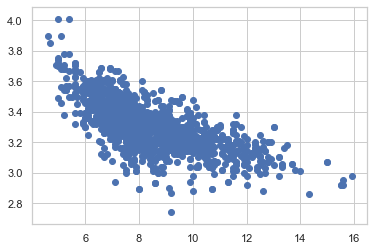

In [20]:
plt.scatter(df1["fixed acidity"],df1.pH,)

### Making Just 2 Catagories in Target Variable

In [21]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df1['quality'] = pd.cut(df1['quality'], bins = bins ,labels=group_names)

In [22]:
df.quality

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Label Encoding Good/Bad as 0/1

In [24]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()


In [25]:
df1['quality'] = label_quality.fit_transform(df1['quality'])

#### Target Variable Visualization after doing label encoading

In [26]:
df1.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

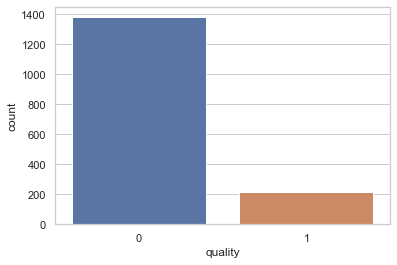

In [27]:
sns.countplot(df1.quality)

### Dividing the data into train and test

In [28]:
X=df1.drop("quality",axis=1)

In [29]:
Y=df1.quality

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=44)

In [31]:
x_train.shape

(1119, 11)

In [32]:
y_train.shape

(1119,)

### Fitting Random Forest Model

In [33]:
fit_rf=RandomForestClassifier(n_estimators=200,random_state=44)

In [34]:
fit_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=44, verbose=0,
                       warm_start=False)

### Predicting the Quality Of Wine

In [35]:
y_predrf=fit_rf.predict(x_test)

### Getting the Score For the Model

In [36]:
fit_rf.score(x_test,y_test)

0.9020833333333333

### Printing The Report For The Model

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       421
           1       0.63      0.49      0.55        59

    accuracy                           0.90       480
   macro avg       0.78      0.73      0.75       480
weighted avg       0.89      0.90      0.90       480



### Using GradientSearch to get The Best HyperParameters for the model

In [40]:
param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': None}


### Using The Best Parameters and Getting The Result

In [41]:
rf_400 = RandomForestClassifier(n_estimators=400,
                  bootstrap=False,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 3)
rf_400.fit(x_train, y_train)
rf_400_score_train = rf_400.score(x_train, y_train)
print("Training score: ",rf_400_score_train)
rf_400_score_test = rf_400.score(x_test, y_test)
print("Testing score: ",rf_400_score_test)

Training score:  0.8909740840035746
Testing score:  0.89375


### Using Support Vector Classifier Model

In [45]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8729166666666667


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
#

In [43]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)


In [47]:
#grid_svc.fit(x_train,y_train)
